In [1]:
from google.colab import drive
drive.mount('./MyDrive')


Mounted at ./MyDrive


In [2]:
cd MyDrive/MyDrive/deepLearning/dataset

/content/MyDrive/MyDrive/deepLearning/dataset


In [3]:
import os
import pandas as pd
# Use local data file or download from GitHub
docker_data_path = "/home/h2o/data/nlp/stopwords.csv"
if os.path.isfile(docker_data_path):
    data_path = docker_data_path
else:
    data_path = "https://raw.githubusercontent.com/h2oai/h2o-tutorials/master/h2o-world-2017/nlp/stopwords.csv"

STOP_WORDS = pd.read_csv(data_path, header=0)
STOP_WORDS = list(STOP_WORDS['STOP_WORD'])

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
anx = pd.read_csv('anx_c.csv')
bi = pd.read_csv('bi_c.csv')
sch = pd.read_csv('sch_c.csv')
adhd = pd.read_csv('adhd_c.csv')
dep = pd.read_csv('dep_c.csv')
nonM = pd.read_csv('nonM_c.csv')

In [6]:
anx = anx.dropna(how = 'any')
bi = bi.dropna(how='any')
sch = sch.dropna(how='any')
adhd = adhd.dropna(how='any')
dep = dep.dropna(how='any')
nonM = nonM.dropna(how='any')

In [7]:
minimum = min(len(bi),len(nonM),len(anx),len(adhd),len(dep),len(sch))
minimum

13155

In [8]:
dep_s = dep.sample(n = minimum,random_state = 1)
nonM_s = nonM.sample(n = minimum,random_state = 1)
anx_s = anx.sample(n = minimum,random_state = 1)
sch_s = sch.sample(n = minimum,random_state = 1)
bi_s = bi.sample(n = minimum,random_state = 1)
adhd_s = adhd.sample(n = minimum,random_state = 1)

In [9]:
data = pd.concat([dep_s[['content','class']],
                  nonM_s[['content','class']],
                  anx_s[['content','class']],
                  bi_s[['content','class']],
                  sch_s[['content','class']],
                  adhd_s[['content','class']]])

In [10]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.3,random_state=1,stratify = data['class'])
valid,test = train_test_split(test,test_size=2/3,random_state=1,stratify=test['class'])


print(train.groupby('class').count())
print(valid.groupby('class').count())
print(test.groupby('class').count())

       content
class         
adhd      9208
anx       9209
bi        9209
dep       9208
nonM      9209
sch       9208
       content
class         
adhd      1316
anx       1315
bi        1315
dep       1316
nonM      1315
sch       1316
       content
class         
adhd      2631
anx       2631
bi        2631
dep       2631
nonM      2631
sch       2631


In [11]:
from nltk.tokenize import word_tokenize
x_train = []
for i in train['content'].values:
  tok = word_tokenize(i)
  for i in STOP_WORDS:
    if i in tok:
        tok.remove(i)
  x_train.append(tok)

x_valid = []
for i in valid['content'].values:
    tok = word_tokenize(i)
    for i in STOP_WORDS:
        if i in tok:
            tok.remove(i)
    x_valid.append(tok)
    
x_test = []
for i in test['content'].values:
    tok = word_tokenize(i)
    for i in STOP_WORDS:
        if i in tok:
            tok.remove(i)
    x_test.append(tok)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

y_train = train['class'].values
y_valid = valid['class'].values
y_test = test['class'].values
convert = {"nonM":0,"dep":1,"anx":2,"bi":3,'adhd':4,'sch':5}
y_train_l = []
for i in y_train:
  y_train_l.append(convert[i])

y_valid_l = []
for i in y_valid:
  y_valid_l.append(convert[i])

    
y_test_l = []
for i in y_test:
  y_test_l.append(convert[i])

y_train_l = to_categorical(y_train_l) # 훈련용 뉴스 기사 레이블의 원-핫 인코딩
y_valid_l = to_categorical(y_valid_l)
y_test_l = to_categorical(y_test_l) # 테스트용 뉴스 기사 레이블의 원-핫 인코딩


In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

In [14]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 71089
등장 빈도가 1번 이하인 희귀 단어의 수: 34306
단어 집합에서 희귀 단어의 비율: 48.25781766518027
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.3484953070565068


In [15]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 36785


In [16]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(x_train)
X_train = tokenizer.texts_to_sequences(x_train)
X_valid = tokenizer.texts_to_sequences(x_valid)
X_test = tokenizer.texts_to_sequences(x_test)

content의 최대 길이 : 7225
content의 평균 길이 : 178.1693544008253


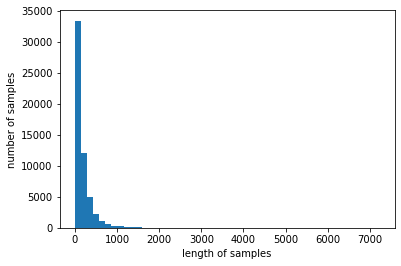

In [17]:
print('content의 최대 길이 :',max(len(l) for l in X_train))
print('content의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [18]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))
    
max_len = 512
#max_len = 256
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 512 이하인 샘플의 비율: 93.63088450887767


In [19]:
X_train_p = pad_sequences(X_train, maxlen = max_len)
X_test_p = pad_sequences(X_test, maxlen = max_len)
X_valid_p = pad_sequences(X_valid,maxlen = max_len)

In [20]:
from gensim.models import FastText
f_model = FastText(x_train, min_count = 1, size = 128, window = 5, sg = 1)

In [21]:
embedding_matrix = np.zeros((vocab_size, 128))

In [22]:
for word, i in tokenizer.word_index.items(): # 훈련 데이터의 단어 집합에서 단어와 정수 인덱스를 1개씩 꺼내온다.
    if i> vocab_size-1:
      break
    else:
      embedding_matrix[i] = f_model.wv[word] 

In [23]:
embedding_matrix.shape

(36785, 128)

In [24]:
embedding_dim = 128
num_heads = 8  # Number of attention heads
dff = 32
import tensorflow as tf
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, max_len = max_len, vocab_size = vocab_size, embedding_dim = embedding_dim,**kwargs):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(vocab_size, embedding_dim,weights = [embedding_matrix],trainable=False)
        self.pos_emb = tf.keras.layers.Embedding(max_len, embedding_dim)

    def get_config(self):
      config = super().get_config().copy()
      config.update({
          'token_emb': self.token_emb,
          'pos_emb': self.pos_emb
      })
      return config
    def call(self, x):
        max_len = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=max_len, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [25]:
import tensorflow as tf

embedding_dim = 128

class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self,embedding_dim = embedding_dim, num_heads=8,**kwargs):
        super(MultiHeadAttention, self).__init__()
        self.embedding_dim = embedding_dim # d_model
        self.num_heads = num_heads

        assert embedding_dim % self.num_heads == 0

        self.projection_dim = embedding_dim // num_heads
        self.query_dense = tf.keras.layers.Dense(embedding_dim)
        self.key_dense = tf.keras.layers.Dense(embedding_dim)
        self.value_dense = tf.keras.layers.Dense(embedding_dim)
        self.dense = tf.keras.layers.Dense(embedding_dim)

    def get_config(self):
      config = super().get_config().copy()
      config.update({
          'embedding_dim':self.embedding_dim,
          'num_heads': self.num_heads,
          'projection_dim': self.projection_dim,
          'query_dense': self.query_dense,
          'key_dense': self.key_dense,
          'value_dense': self.value_dense,
          'dense': self.dense
      })
      return config

    def scaled_dot_product_attention(self, query, key, value):
        matmul_qk = tf.matmul(query, key, transpose_b=True)
        depth = tf.cast(tf.shape(key)[-1], tf.float32)
        logits = matmul_qk / tf.math.sqrt(depth)
        attention_weights = tf.nn.softmax(logits, axis=-1)
        output = tf.matmul(attention_weights, value)
        return output, attention_weights

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]

        # (batch_size, seq_len, embedding_dim)
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)

        # (batch_size, num_heads, seq_len, projection_dim)
        query = self.split_heads(query, batch_size)  
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        scaled_attention, _ = self.scaled_dot_product_attention(query, key, value)
        # (batch_size, seq_len, num_heads, projection_dim)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  

        # (batch_size, seq_len, embedding_dim)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.embedding_dim))
        outputs = self.dense(concat_attention)
        return outputs

In [26]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embedding_dim = embedding_dim, num_heads = num_heads, dff = dff, rate=0.1,**kwargs):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(embedding_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(dff, activation="relu"),
             tf.keras.layers.Dense(embedding_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def get_config(self):
      config = super().get_config().copy()
      config.update({
          'att': self.att,
          'ffn': self.ffn,
          'layernorm1': self.layernorm1,
          'layernorm2': self.layernorm2,
          'dropout1': self.dropout1,
          'dropout2': self.dropout2
      })
      return config
    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1) 
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



inputs = tf.keras.layers.Input(shape=(max_len,))
embedding_layer = TokenAndPositionEmbedding(max_len, vocab_size, embedding_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embedding_dim, num_heads, dff)
x = transformer_block(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(6, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [28]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model_all_SelfA_f.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [29]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train_p, y_train_l, batch_size=256, epochs=30, callbacks=[es, mc],validation_data=(X_valid_p, y_valid_l))

Epoch 1/30
216/216 [==============================] - 156s 704ms/step - loss: 1.0817 - accuracy: 0.5974 - val_loss: 0.6149 - val_accuracy: 0.7959

Epoch 00001: val_accuracy improved from -inf to 0.79590, saving model to best_model_all_SelfA_f.h5
Epoch 2/30
216/216 [==============================] - 152s 703ms/step - loss: 0.6027 - accuracy: 0.8057 - val_loss: 0.5369 - val_accuracy: 0.8210

Epoch 00002: val_accuracy improved from 0.79590 to 0.82098, saving model to best_model_all_SelfA_f.h5
Epoch 3/30
216/216 [==============================] - 152s 703ms/step - loss: 0.5513 - accuracy: 0.8213 - val_loss: 0.5192 - val_accuracy: 0.8272

Epoch 00003: val_accuracy improved from 0.82098 to 0.82719, saving model to best_model_all_SelfA_f.h5
Epoch 4/30
216/216 [==============================] - 152s 702ms/step - loss: 0.5263 - accuracy: 0.8288 - val_loss: 0.5279 - val_accuracy: 0.8260

Epoch 00004: val_accuracy did not improve from 0.82719
Epoch 5/30
216/216 [==============================] - 

In [30]:
from tensorflow.keras.models import load_model
loaded_model = load_model('best_model_all_SelfA_f.h5',custom_objects={'TokenAndPositionEmbedding':TokenAndPositionEmbedding,
                                                                    'MultiHeadAttention':MultiHeadAttention,
                                                                    'TransformerBlock':TransformerBlock
                                                                    })

In [31]:
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test_p, y_test_l)[1]))

494/494 [==============================] - 17s 34ms/step - loss: 0.5100 - accuracy: 0.8297
테스트 정확도: 0.8297


In [32]:
yPred = model.predict(X_test_p)
y_predicted_l = [ np.argmax(t) for t in yPred ]

In [33]:
y_tested_l = [ np.argmax(t) for t in y_test_l ]

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_tested_l, y_predicted_l)
matrix

array([[2429,   88,   35,   21,   43,   15],
       [  83, 2187,  131,  111,   70,   49],
       [  92,  298, 2071,   67,   62,   41],
       [  62,  265,   59, 2060,   85,  100],
       [  71,   74,   76,   55, 2329,   26],
       [  90,  177,   74,  195,   79, 2016]])

In [35]:
from sklearn.metrics import classification_report
result = np.array(loaded_model.predict(X_test_p)).tolist()
test_label = [np.argmax(i) for i in y_test_l]
predict_label = [np.argmax(i) for i in result]
target_names = ['nonM', 'dep', 'anx','bi','adhd','sch']
print(classification_report(test_label, predict_label, target_names=target_names))

              precision    recall  f1-score   support

        nonM       0.88      0.91      0.89      2631
         dep       0.72      0.82      0.77      2631
         anx       0.85      0.78      0.82      2631
          bi       0.85      0.76      0.80      2631
        adhd       0.88      0.87      0.88      2631
         sch       0.81      0.83      0.82      2631

    accuracy                           0.83     15786
   macro avg       0.83      0.83      0.83     15786
weighted avg       0.83      0.83      0.83     15786



In [36]:
test['content'][12777:12777 + 1].tolist()[0]

"bipolar type two is treatment resistant and i have antisocial personality disorder help yes i 'm fucked in the head i have bipolar type two ptsd and antisocial personality disorder i 've tried a dozen or more medications over the years with little to no success i 'm currently on lamictal busbar gabapentin cogentin and latuda i ca n't really say what difference the medication makes but of course i take them anyway i believe my disorders are treatment resistant because i 've been on so many medications for so many years even with the meds i 'm suicidal and have panic attacks all day and because of the opiate epidemic induced panic they wo n't give me benzos anymore because people might abuse them when i was on benzos i rarely had panic attacks and never abused them so i 'm left having panic attacks all day everyday furthermore i was diagnosed with antisocial personality disorder years ago i was in denial until recently when i spent six months in jail and had time to think about it the d

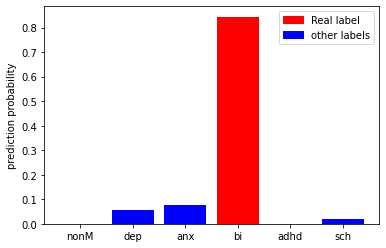

In [37]:
import matplotlib.pyplot as plt
x = np.arange(6)

label = ['nonM','dep','anx','bi','adhd','sch']
color = []
for i in range(len(label)):
  if y_test_l[12777][i] == 0:
    color.append('blue')
  else:
    color.append('red')
plt.bar(x,result[12777],color = color)
plt.xticks(x,label)
plt.ylabel('prediction probability')
colors = {'Real label':'red', 'other labels':'blue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.show()